# Import Library

In [23]:
#!pip install pytrends
import pandas as pd  
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

In [24]:
trends = TrendReq()

In [25]:
trends.build_payload(kw_list=["Machine Learning"])
data = trends.interest_by_region()
data = data.sort_values(by="Machine Learning", ascending=False)
data = data.head(10)
print(data)

             Machine Learning
geoName                      
China                     100
Singapore                  47
Ethiopia                   46
St. Helena                 37
India                      35
Hong Kong                  27
Pakistan                   25
Tunisia                    24
South Korea                23
Nepal                      23


# Data Viz

In [26]:
data.reset_index().plot(x="geoName", y="Machine Learning", 
                        figsize=(20,15), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

In [27]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['Machine Learning'])
data = data.interest_over_time()
fig, ax = plt.subplots(figsize=(20, 15))
data['Machine Learning'].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches for Machine Learning', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

# Conclusion
#### So we can see that searches based on “machine learning” on Google started to increase in 2017 and the highest searches were done in 2020 till today. This is how we can analyze Google searches based on any keyword. A business can perform Google search analysis to understand what people are looking for on Google at any given time. I hope you liked this article on Google search analysis with Python. Feel free to ask your valuable questions in the comments section below.

# Çözüm
#### Dolayısıyla Google'da “makine öğrenimi”ne dayalı aramaların 2017 yılında artmaya başladığını ve bugüne kadar en yüksek aramaların 2020 yılında yapıldığını görebiliyoruz. Herhangi bir anahtar kelimeye göre Google aramalarını bu şekilde analiz edebiliriz. Bir işletme, herhangi bir zamanda insanların Google'da ne aradığını anlamak için Google arama analizi yapabilir. Umarım Python ile Google arama analizi hakkındaki bu makaleyi beğenmişsinizdir. Değerli sorularınızı aşağıdaki yorumlar bölümünde sormaktan çekinmeyin.

## Build Payload
#### Now, we will be creating a dataframe of the top 10 countries that search for the term “CLOUD COMPUTING“. For this, we will be using the method build_payload, which allows storing a list of keywords that you want to search. In this, you can also specify the timeframe and the category to query the data from. 

## Build Payload
#### Now, we will be creating a dataframe of the top 10 countries that search for the term “CLOUD COMPUTING“. For this, we will be using the method build_payload, which allows storing a list of keywords that you want to search. In this, you can also specify the timeframe and the category to query the data from. 

## Yük Oluştur
#### Şimdi, “BULUT BİLGİSAYAR” terimini arayan ilk 10 ülkenin veri çerçevesini oluşturacağız. Bunun için, aramak istediğiniz anahtar kelimelerin bir listesini saklamaya izin veren build_payload yöntemini kullanacağız. Bunda, verileri sorgulamak için zaman çerçevesini ve kategoriyi de belirleyebilirsiniz.

In [28]:
Trending_topics = TrendReq(hl='en-US', tz=360)

In [29]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')

## Interest Over Time
#### The interest_over_time() method, returns the historical, indexed data for when the specified keyword was most searched according to the timeframe mentioned in the build payload method.

## Zaman İçinde Faiz
#### Interest_over_time() yöntemi, yapı yükü yönteminde belirtilen zaman çerçevesine göre belirtilen anahtar kelimenin en çok arandığı zamana ilişkin geçmiş, dizine alınmış verileri döndürür.

In [30]:
Trending_topics.build_payload(kw_list=["Cloud Computing"],
                              cat=0, timeframe='today 12-m')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2022-02-13              100      False
2022-05-08               97      False
2022-03-06               96      False
2022-09-11               94      False
2022-02-27               94      False
2022-03-20               93      False
2022-05-15               91      False
2022-04-24               90      False
2022-02-20               89      False
2022-06-05               88      False


## Historical Hour Interest
#### The get_historical_interest() method returns the historical, indexed, hourly data for when the specified keyword was most searched. You can also mention various time period parameters for which you want the historical data such as year_start, month_start, day_start, hour_start, year_end, month_end, day_end, and hour_end. 

## Tarihsel Saat Faizi
#### get_historical_interest() yöntemi, belirtilen anahtar kelimenin en çok arandığı zamana ilişkin geçmiş, dizine alınmış, saatlik verileri döndürür. Ayrıca yıl_başlangıç, ay_başlangıç, gün_başlangıç, saat_başlangıç, yıl_bitiş, ay_bitiş, gün_bitiş ve saat_bitiş gibi geçmiş verilerini istediğiniz çeşitli zaman periyodu parametrelerinden de bahsedebilirsiniz.

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
kw_list = ["Cloud Computing"]
Trending_topics.build_payload(kw_list)
data = Trending_topics.get_historical_interest(
  kw_list, year_start=2018, month_start=1, day_start=1,
  hour_start=0, year_end=2018, month_end=2, day_end=1,
  hour_end=0, cat=0, geo='', gprop='', sleep=0)
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

                     Cloud Computing  isPartial
date                                           
2018-01-30 11:00:00              100      False
2018-01-10 07:00:00              100      False
2018-01-24 05:00:00              100      False
2018-01-16 04:00:00              100      False
2018-01-04 05:00:00              100      False
2018-01-18 23:00:00               99      False
2018-01-03 00:00:00               96      False
2018-01-19 04:00:00               91      False
2018-01-15 04:00:00               91      False
2018-01-19 09:00:00               87      False


## Interest By Region
#### Next is the interest_by_region method, this will let you know the performance of the keyword per region. It will show results on a scale of 0-100, where 100 indicates the country with the most search and 0 indicates with least search or not enough data. 

## Bölgeye Göre İlgi Alanı
#### Sıradaki ilgi_bölgesi yöntemidir, bu size anahtar kelimenin bölge başına performansını bildirecektir. Sonuçları 0-100 arasında bir ölçekte gösterecektir; burada 100, en fazla arama yapılan ülkeyi ve 0, en az arama yapılan veya yeterli veri olmayan ülkeyi belirtir.

In [33]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing", 
                        ascending = False)
data = data.head(10)
print(data)

                  Cloud Computing
geoName                          
Eswatini                      100
Papua New Guinea               71
Cuba                           56
Madagascar                     39
Somalia                        34
Zimbabwe                       33
Albania                        13
Libya                          11
Paraguay                        9
Estonia                         8


#### Next, we can visualize the above data using a bar chart.

#### Ardından, bir çubuk grafik kullanarak yukarıdaki verileri görselleştirebiliriz.

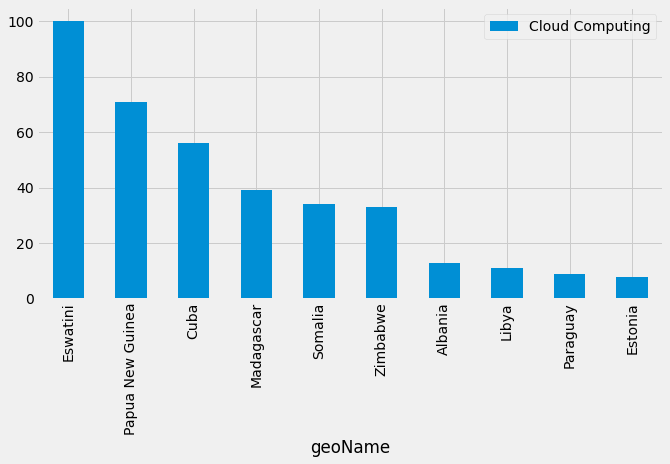

In [34]:
data.reset_index().plot(x='geoName', y='Cloud Computing',
                        figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

## Top Charts
#### Using this method, we can get the top trending searches yearly. So, let us check what were the searches trending in the year 2020.

## En İyiler
#### Bu yöntemi kullanarak, yıllık olarak en çok trend olan aramaları alabiliriz. Öyleyse, 2020 yılında trend olan aramaların neler olduğuna bir göz atalım.

In [35]:
df = Trending_topics.top_charts(2020, hl='en-US', 
                                tz=300, geo='GLOBAL')
df.head(10)

title exploreQuery
0           Coronavirus             
1      Election results             
2           Kobe Bryant             
3                  Zoom             
4                   IPL             
5  India vs New Zealand             
6    Coronavirus update             
7  Coronavirus symptoms             
8             Joe Biden             
9      Google Classroom

#### From the above output, we can see, that the most searched topic of 2020 is “Coronavirus” and then the rest.

#### Yukarıdaki çıktıdan, 2020'nin en çok aranan konusunun “Koronavirüs” ve ardından geri kalanını görebiliriz.

## Related Queries
#### Whenever a user searches for something about a particular topic on Google there is a high probability that the user will search for more queries related to the same topic. These are known as related queries. Let us find a list of related queries for “Cloud Computing”.

## İlgili Sorgular
#### Bir kullanıcı Google'da belirli bir konu hakkında bir şey aradığında, kullanıcının aynı konuyla ilgili daha fazla sorgu araması olasılığı yüksektir. Bunlar ilgili sorgular olarak bilinir. “Bulut Bilişim” için ilgili sorguların bir listesini bulalım.

In [36]:
Trending_topics.build_payload(kw_list=['Cloud Computing'])
related_queries = Trending_topics.related_queries()
related_queries.values()

dict_values([{'top':                           query  value
0                          what    100
1                 what is cloud     87
2       what is cloud computing     85
3                           the     80
4                         which     37
5      cloud computing services     37
6       cloud computing service     36
7                cloud services     35
8      cloud computing security     33
9                cloud security     31
10  what is the cloud computing     31
11       google cloud computing     26
12                 google cloud     25
13     cloud computing software     23
14      cloud computing meaning     22
15          cloud computing aws     22
16                    aws cloud     22
17                          aws     22
18       cloud computing system     20
19   cloud computing technology     20
20             cloud technology     19
21   cloud computing definition     19
22          cloud computing pdf     18
23  security in cloud computing     18
24  

## Keyword Suggestions
#### The suggestions() method, will help you to explore what the world is searching for. It returns a list of additional suggested keywords that can be used to filter a trending search on Google.

## Anahtar Kelime Önerileri
#### Öneriler() yöntemi, dünyanın ne aradığını keşfetmenize yardımcı olacaktır. Google'da trend olan bir aramayı filtrelemek için kullanılabilecek ek önerilen anahtar kelimelerin bir listesini döndürür.

In [37]:
keywords = Trending_topics.suggestions(
  keyword='Cloud Computing')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid') 

title               type
0               Cloud computing              Topic
1                 Alibaba Cloud            Company
2      Cloud computing security              Topic
3           IBM cloud computing  Computer software
4  Cloud computing architecture              Topic